In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d nelgiriyewithana/emotions

 57% 9.00M/15.7M [00:00<00:00, 68.4MB/s]
100% 15.7M/15.7M [00:00<00:00, 101MB/s] 


In [2]:
!unzip '/content/emotions.zip' -d '/content/'

Archive:  /content/emotions.zip
  inflating: /content/text.csv       


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('text.csv')

In [5]:
df.shape

(416809, 3)

In [6]:
df.head(2)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0


In [7]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [115]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [113]:
df.duplicated().sum()

15130

In [116]:
df.drop_duplicates(inplace=True)

In [8]:
df.sample()

,text,label
365708,i least expect it and i feel so isolated,0


## EDA

In [102]:
plt.style.use('seaborn-v0_8')
from wordcloud import WordCloud

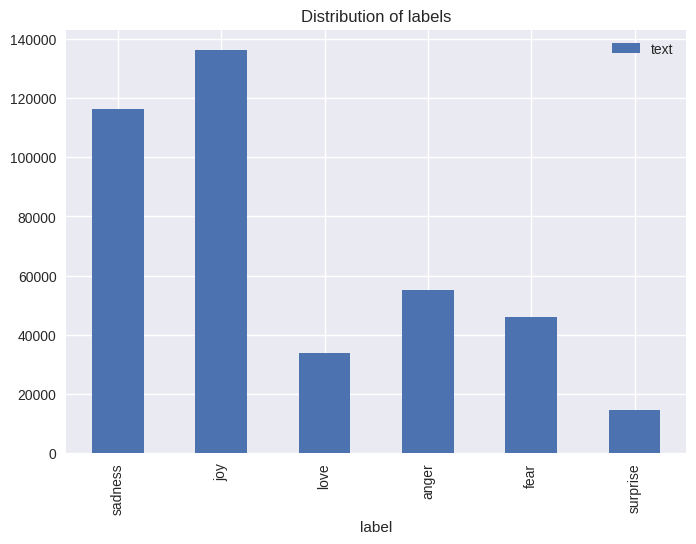

In [117]:
df.groupby(['label']).count().plot(kind='bar')
plt.xticks(ticks=list(encoding_map.keys()), labels=list(encoding_map.values()))
plt.title("Distribution of labels")
plt.show()

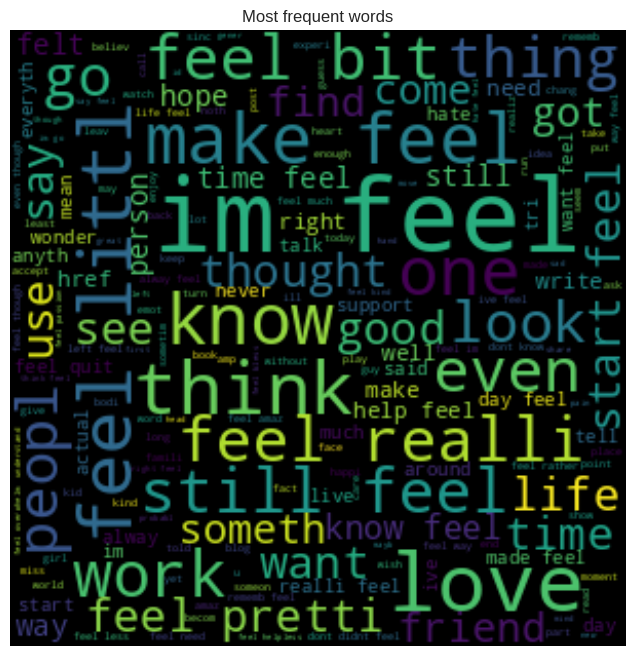

In [118]:
text = " ".join(df['text'])
wordcloud = WordCloud(width=300, height=300, background_color="black", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

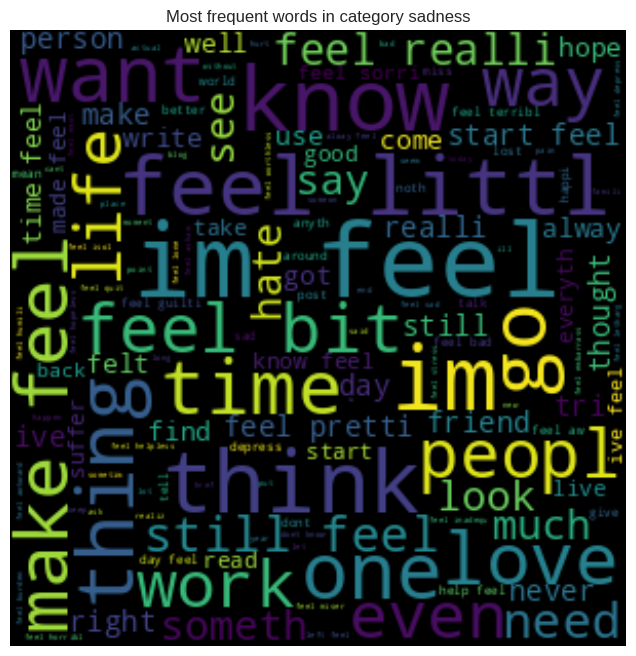

In [119]:
text = " ".join(df[df['label'] == 0]['text'])
wordcloud = WordCloud(width=300, height=300, background_color="black", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in category sadness")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

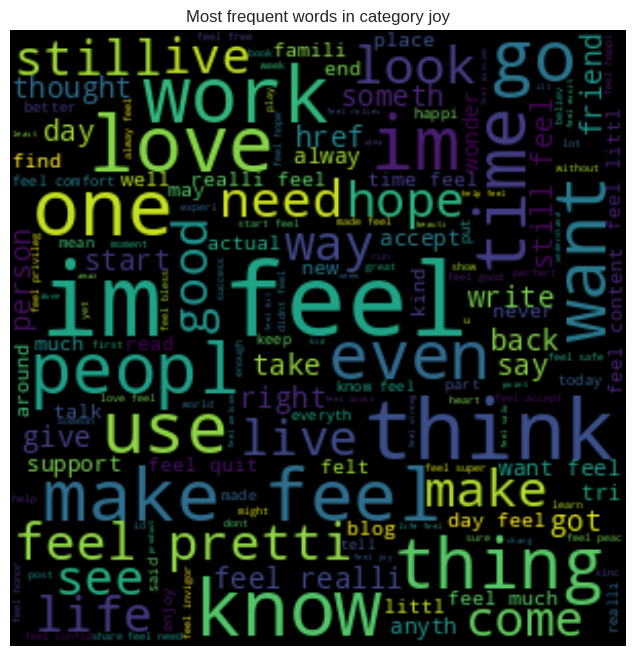

In [120]:
text = " ".join(df[df['label'] == 1]['text'])
wordcloud = WordCloud(width=300, height=300, background_color="black", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in category joy")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

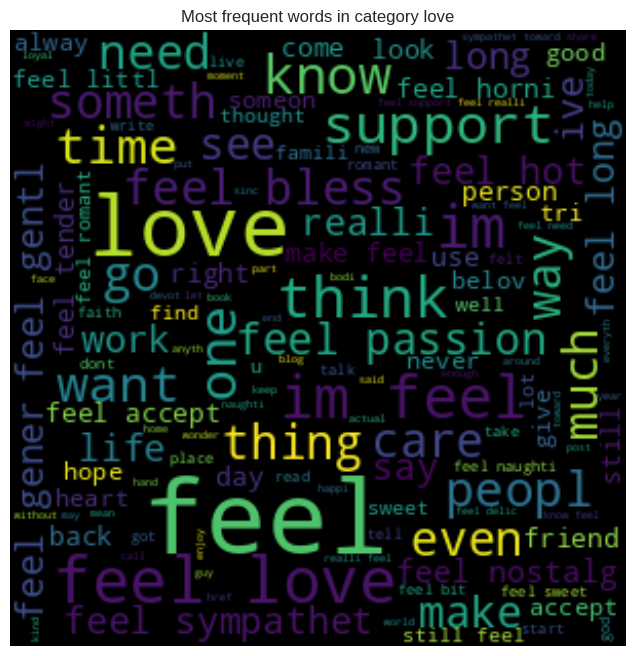

In [121]:
text = " ".join(df[df['label'] == 2]['text'])
wordcloud = WordCloud(width=300, height=300, background_color="black", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in category love")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

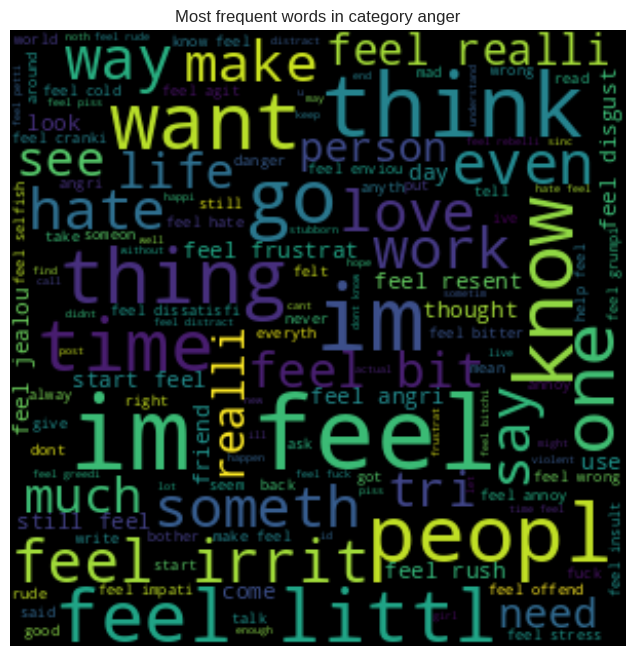

In [122]:
text = " ".join(df[df['label'] == 3]['text'])
wordcloud = WordCloud(width=300, height=300, background_color="black", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in category anger")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

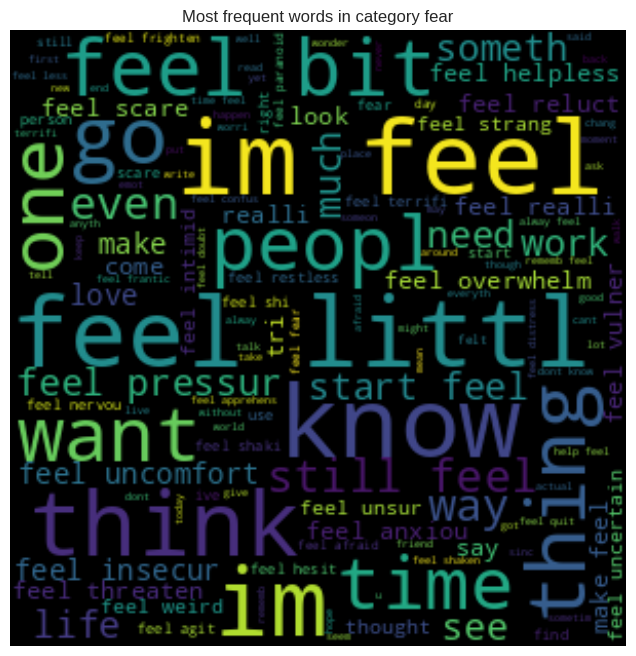

In [123]:
text = " ".join(df[df['label'] == 4]['text'])
wordcloud = WordCloud(width=300, height=300, background_color="black", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in category fear")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

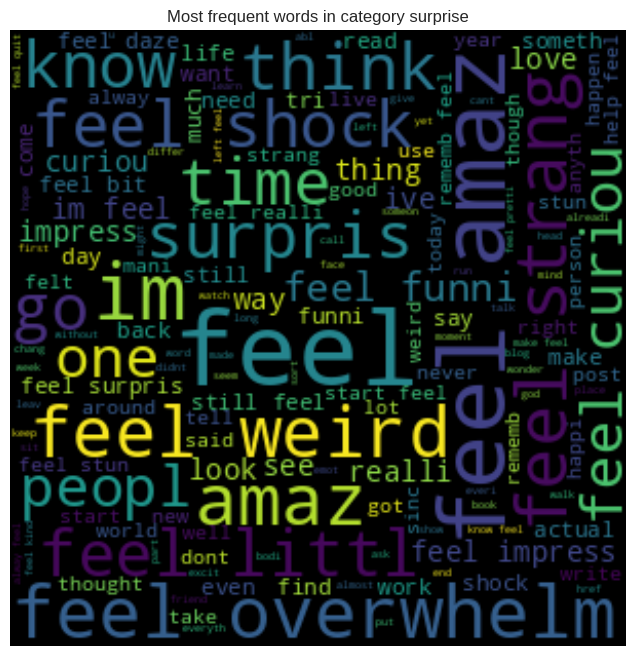

In [124]:
text = " ".join(df[df['label'] == 5]['text'])
wordcloud = WordCloud(width=300, height=300, background_color="black", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in category surprise")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Data Preprocessing

In [9]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [10]:
def text_preprocessing(text):
  # Standardization
  text = text.lower()
  # Punctuation Removal
  text = text.translate(str.maketrans('', '', string.punctuation))
  # Remove numbers in the text
  words = [word for word in word_tokenize(text) if word.isalpha()]
  # Remove stop words
  tokens = [word for word in words if word not in stopwords.words('english')]
  return " ".join(tokens)


In [60]:
text_preprocessing("Hell0, My name is Robert. I'm a Data Scientist. Its nice meeting you!!!")

'name robert im data scientist nice meeting'

In [11]:
def random_sample(df, size=10000):
  return df.sample(size)

In [63]:
sample_df = random_sample(df)

In [64]:
sample_df['text'] = sample_df['text'].apply(text_preprocessing)

In [92]:
encoding_map = {0: 'sadness', 1: 'joy', 2: 'love', 3:'anger', 4:'fear', 5:'surprise'}

In [65]:
sample_df

,text,label
316713,nodded head began turn around feeling defeated...,0
251268,need change subject im feeling weepy,0
197897,assure reporting process traumatic requires br...,0
401899,feel distraught barely get writing deadlines done,4
260411,love inverted suspension though one makes feel...,1
...,...,...
189777,one feel mir considerate one towards seungah f...,1
42357,feel pain jackie family precious kensley,1
321528,came back run morning feeling triumphant parti...,1
113089,feel brave therefore im going try show one lat...,1


## Machine Learning Based Approach

In [51]:
import gensim.downloader

In [52]:
glove_vectors = gensim.downloader.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [71]:
def doc_to_vec(doc):
  words = doc.split()
  vec = []
  for word in words:
    if word in glove_vectors.index_to_key:
      vec.append(glove_vectors[word])
  return np.mean(vec, axis=0)

In [74]:
X = sample_df['text']
y = sample_df['label']

In [79]:
vectors = []
for row in X.values:
  vectors.append(doc_to_vec(row))

In [80]:
vectors = np.array(vectors)

In [81]:
vectors.shape

(10000, 200)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, y, random_state=61, test_size=0.2)

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
from sklearn.metrics import accuracy_score

In [88]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.544

## Using Convnet

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [13]:
def text_preprocessing(text):
  # Standardization
  text = text.lower()
  # Punctuation Removal
  text = text.translate(str.maketrans('', '', string.punctuation))
  # Remove numbers in the text
  words = [word for word in word_tokenize(text) if word.isalpha()]
  # Remove stop words
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
  return " ".join(tokens)

In [14]:
sdf = random_sample(df)
sdf['text'] = sdf['text'].apply(text_preprocessing)

In [15]:
X = sdf['text']
y = sdf['label']

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [17]:
len(tokenizer.word_counts)

8229

In [22]:
matrix = tokenizer.texts_to_sequences(X)

In [27]:
len(max(matrix, key=len))

38

In [28]:
matrix = pad_sequences(matrix, maxlen=40, padding='post')

In [33]:
matrix.shape

(10000, 40)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(matrix, y.values, random_state=61, test_size=0.2)

In [35]:
X_train.shape

(8000, 40)

In [36]:
y_train.shape

(8000,)

In [37]:
model = Sequential()
model.add(layers.Embedding(input_dim=8230, output_dim=100, input_length=40))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPool1D(2))

model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPool1D(2))

model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPool1D(2))

model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           823000    
                                                                 
 conv1d (Conv1D)             (None, 38, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            2

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 24s 70ms/step - loss: 1.3645 - accuracy: 0.4621 - val_loss: 1.3523 - val_accuracy: 0.6975
Epoch 2/5
250/250 [==============================] - 5s 19ms/step - loss: 0.4902 - accuracy: 0.8320 - val_loss: 0.5701 - val_accuracy: 0.8180
Epoch 3/5
250/250 [==============================] - 3s 11ms/step - loss: 0.1896 - accuracy: 0.9371 - val_loss: 0.4815 - val_accuracy: 0.8420
Epoch 4/5
250/250 [==============================] - 3s 13ms/step - loss: 0.1071 - accuracy: 0.9657 - val_loss: 0.7543 - val_accuracy: 0.8185
Epoch 5/5
250/250 [==============================] - 3s 11ms/step - loss: 0.0756 - accuracy: 0.9739 - val_loss: 0.6727 - val_accuracy: 0.8360


## Using RNN

In [51]:
rnn = tf.keras.Sequential()
rnn.add(layers.Embedding(input_dim=8230, output_dim=100, input_length=40))
rnn.add(layers.Bidirectional(layers.LSTM(128)))
rnn.add(layers.Dense(128, activation='relu'))
rnn.add(layers.Dense(6, activation='softmax'))

In [52]:
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = rnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 15s 48ms/step - loss: 1.2769 - accuracy: 0.5104 - val_loss: 0.8039 - val_accuracy: 0.7250
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.4754 - accuracy: 0.8400 - val_loss: 0.4858 - val_accuracy: 0.8390
Epoch 3/10
250/250 [==============================] - 3s 11ms/step - loss: 0.1990 - accuracy: 0.9316 - val_loss: 0.4714 - val_accuracy: 0.8450
Epoch 4/10
250/250 [==============================] - 3s 12ms/step - loss: 0.1022 - accuracy: 0.9649 - val_loss: 0.4810 - val_accuracy: 0.8485
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0665 - accuracy: 0.9754 - val_loss: 0.5863 - val_accuracy: 0.8345
Epoch 6/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0582 - accuracy: 0.9804 - val_loss: 0.6083 - val_accuracy: 0.8490
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0388 - accuracy: 0.9866 - val_loss: 0.7005 - val_accuracy: 0.828

## Using Entire Data

In [54]:
df['text'] = df['text'].apply(text_preprocessing)

In [55]:
X = df['text']
y = df['label'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
len(tokenizer.word_counts)

51870

In [56]:
matrix = tokenizer.texts_to_sequences(X)
len(max(matrix, key=len))

79

In [57]:
matrix = pad_sequences(matrix, maxlen=80, padding='post')

In [58]:
matrix.shape

(416809, 80)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(matrix, y, random_state=61, test_size=0.2)

In [62]:
rnn = tf.keras.Sequential()
rnn.add(layers.Embedding(input_dim=51870, output_dim=100, input_length=80))
rnn.add(layers.Bidirectional(layers.LSTM(128)))
rnn.add(layers.Dense(128, activation='relu'))
rnn.add(layers.Dense(6, activation='softmax'))

In [63]:
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
history = rnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/5
3335/3335 [==============================] - 88s 25ms/step - loss: 0.3336 - accuracy: 0.8642 - val_loss: 0.1634 - val_accuracy: 0.9181
Epoch 2/5
3335/3335 [==============================] - 57s 17ms/step - loss: 0.1453 - accuracy: 0.9248 - val_loss: 0.1472 - val_accuracy: 0.9216
Epoch 3/5
3335/3335 [==============================] - 53s 16ms/step - loss: 0.1275 - accuracy: 0.9300 - val_loss: 0.1437 - val_accuracy: 0.9211
Epoch 4/5
3335/3335 [==============================] - 52s 16ms/step - loss: 0.1163 - accuracy: 0.9333 - val_loss: 0.1497 - val_accuracy: 0.9185
Epoch 5/5
3335/3335 [==============================] - 51s 15ms/step - loss: 0.1082 - accuracy: 0.9357 - val_loss: 0.1563 - val_accuracy: 0.9194


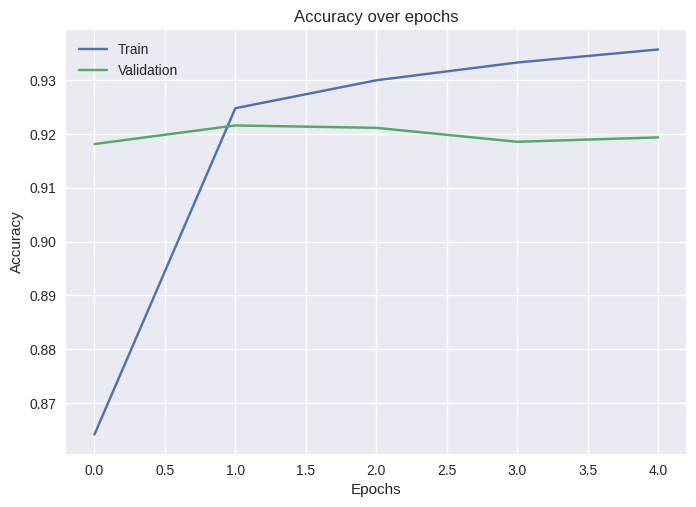

In [88]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over epochs")
plt.show()

In [69]:
y_pred = rnn.predict(X_test)

2606/2606 [==============================] - 14s 5ms/step


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

<Axes: >

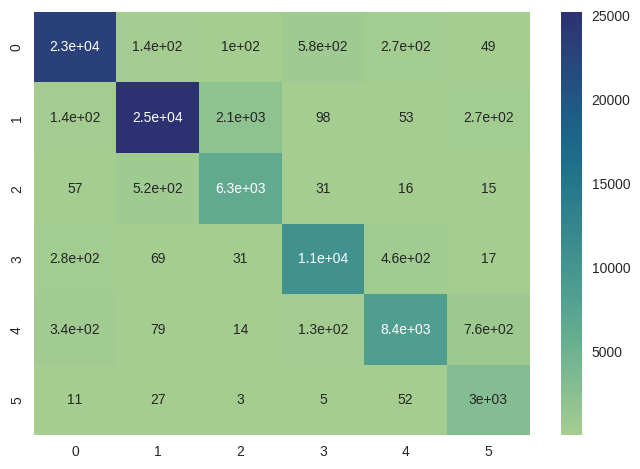

In [87]:
sns.heatmap(confusion_matrix(y_test, y_pred.argmax(axis=1)), annot=True, cmap='crest')

In [82]:
accuracy_score(y_test, y_pred.argmax(axis=1))

0.9193517430004079

In [65]:
rnn.save_weights('./checkpoints/tweetSeniment')

In [66]:
rnn.save('tweetSetiment.keras')